# # Module 2 Assignment 1: House Prices (Kaggle)


# Data preparation, exploration, visualization

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
#Display all output in cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading the data set

**Load the train csv file using pandas.**

In [3]:
train=pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Basic Data Exploration 

**In this step, the below operations will be performed to check what the data-set looks like:**

- **Checking the head of the dataset**
- **Checking the shape of the dataset**
- **Checking the info of the dataset**
- **Checking the summary of the dataset**

In [4]:
#Top 5 records of the data-set
print("Train dataset: ")
train.head()
print("Test dataset: ")
test.head()

Train dataset: 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Test dataset: 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Shape (rows, columns) of the dataset
print("Train dataset: ")
train.shape
print("Test dataset: ")
test.shape

Train dataset: 


(1460, 81)

Test dataset: 


(1459, 80)

In [6]:
# Information about the data and the datatypes
print("Train dataset: ")
train.info()
print("Test dataset: ")
test.info()

Train dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64

In [7]:
#Spread of the numerical variables
print("Train dataset: ")
train.describe()
print("Test dataset: ")
test.describe()

Train dataset: 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Test dataset: 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Check for Duplicate records


In [8]:
# Check for duplicate data
dups_train = train.duplicated()
print('Number of duplicate rows in train dataset = %d' % (dups_train.sum()))
train[dups_train]

dups_test = test.duplicated()
print('Number of duplicate rows in test dataset = %d' % (dups_test.sum()))
test[dups_test]

Number of duplicate rows in train dataset = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Number of duplicate rows in test dataset = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


## Outlier Treatment

**To check for outliers/extreme values, box-plots are used.**

In [9]:
# Printing numeric columns and its count
num_cols_train = train._get_numeric_data().columns 
display(num_cols_train)
print("Count of train: ", len(num_cols_train))
num_cols_train = num_cols_train[1:] ##remove Id from the list

# Printing numeric columns and its count
num_cols_test = test._get_numeric_data().columns 
display(num_cols_test)
print("Count of test: ", len(num_cols_test))
num_cols_test = num_cols_test[1:] ##remove Id from the list

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Count of train:  38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

Count of test:  37


Train dataset numerical columns: 


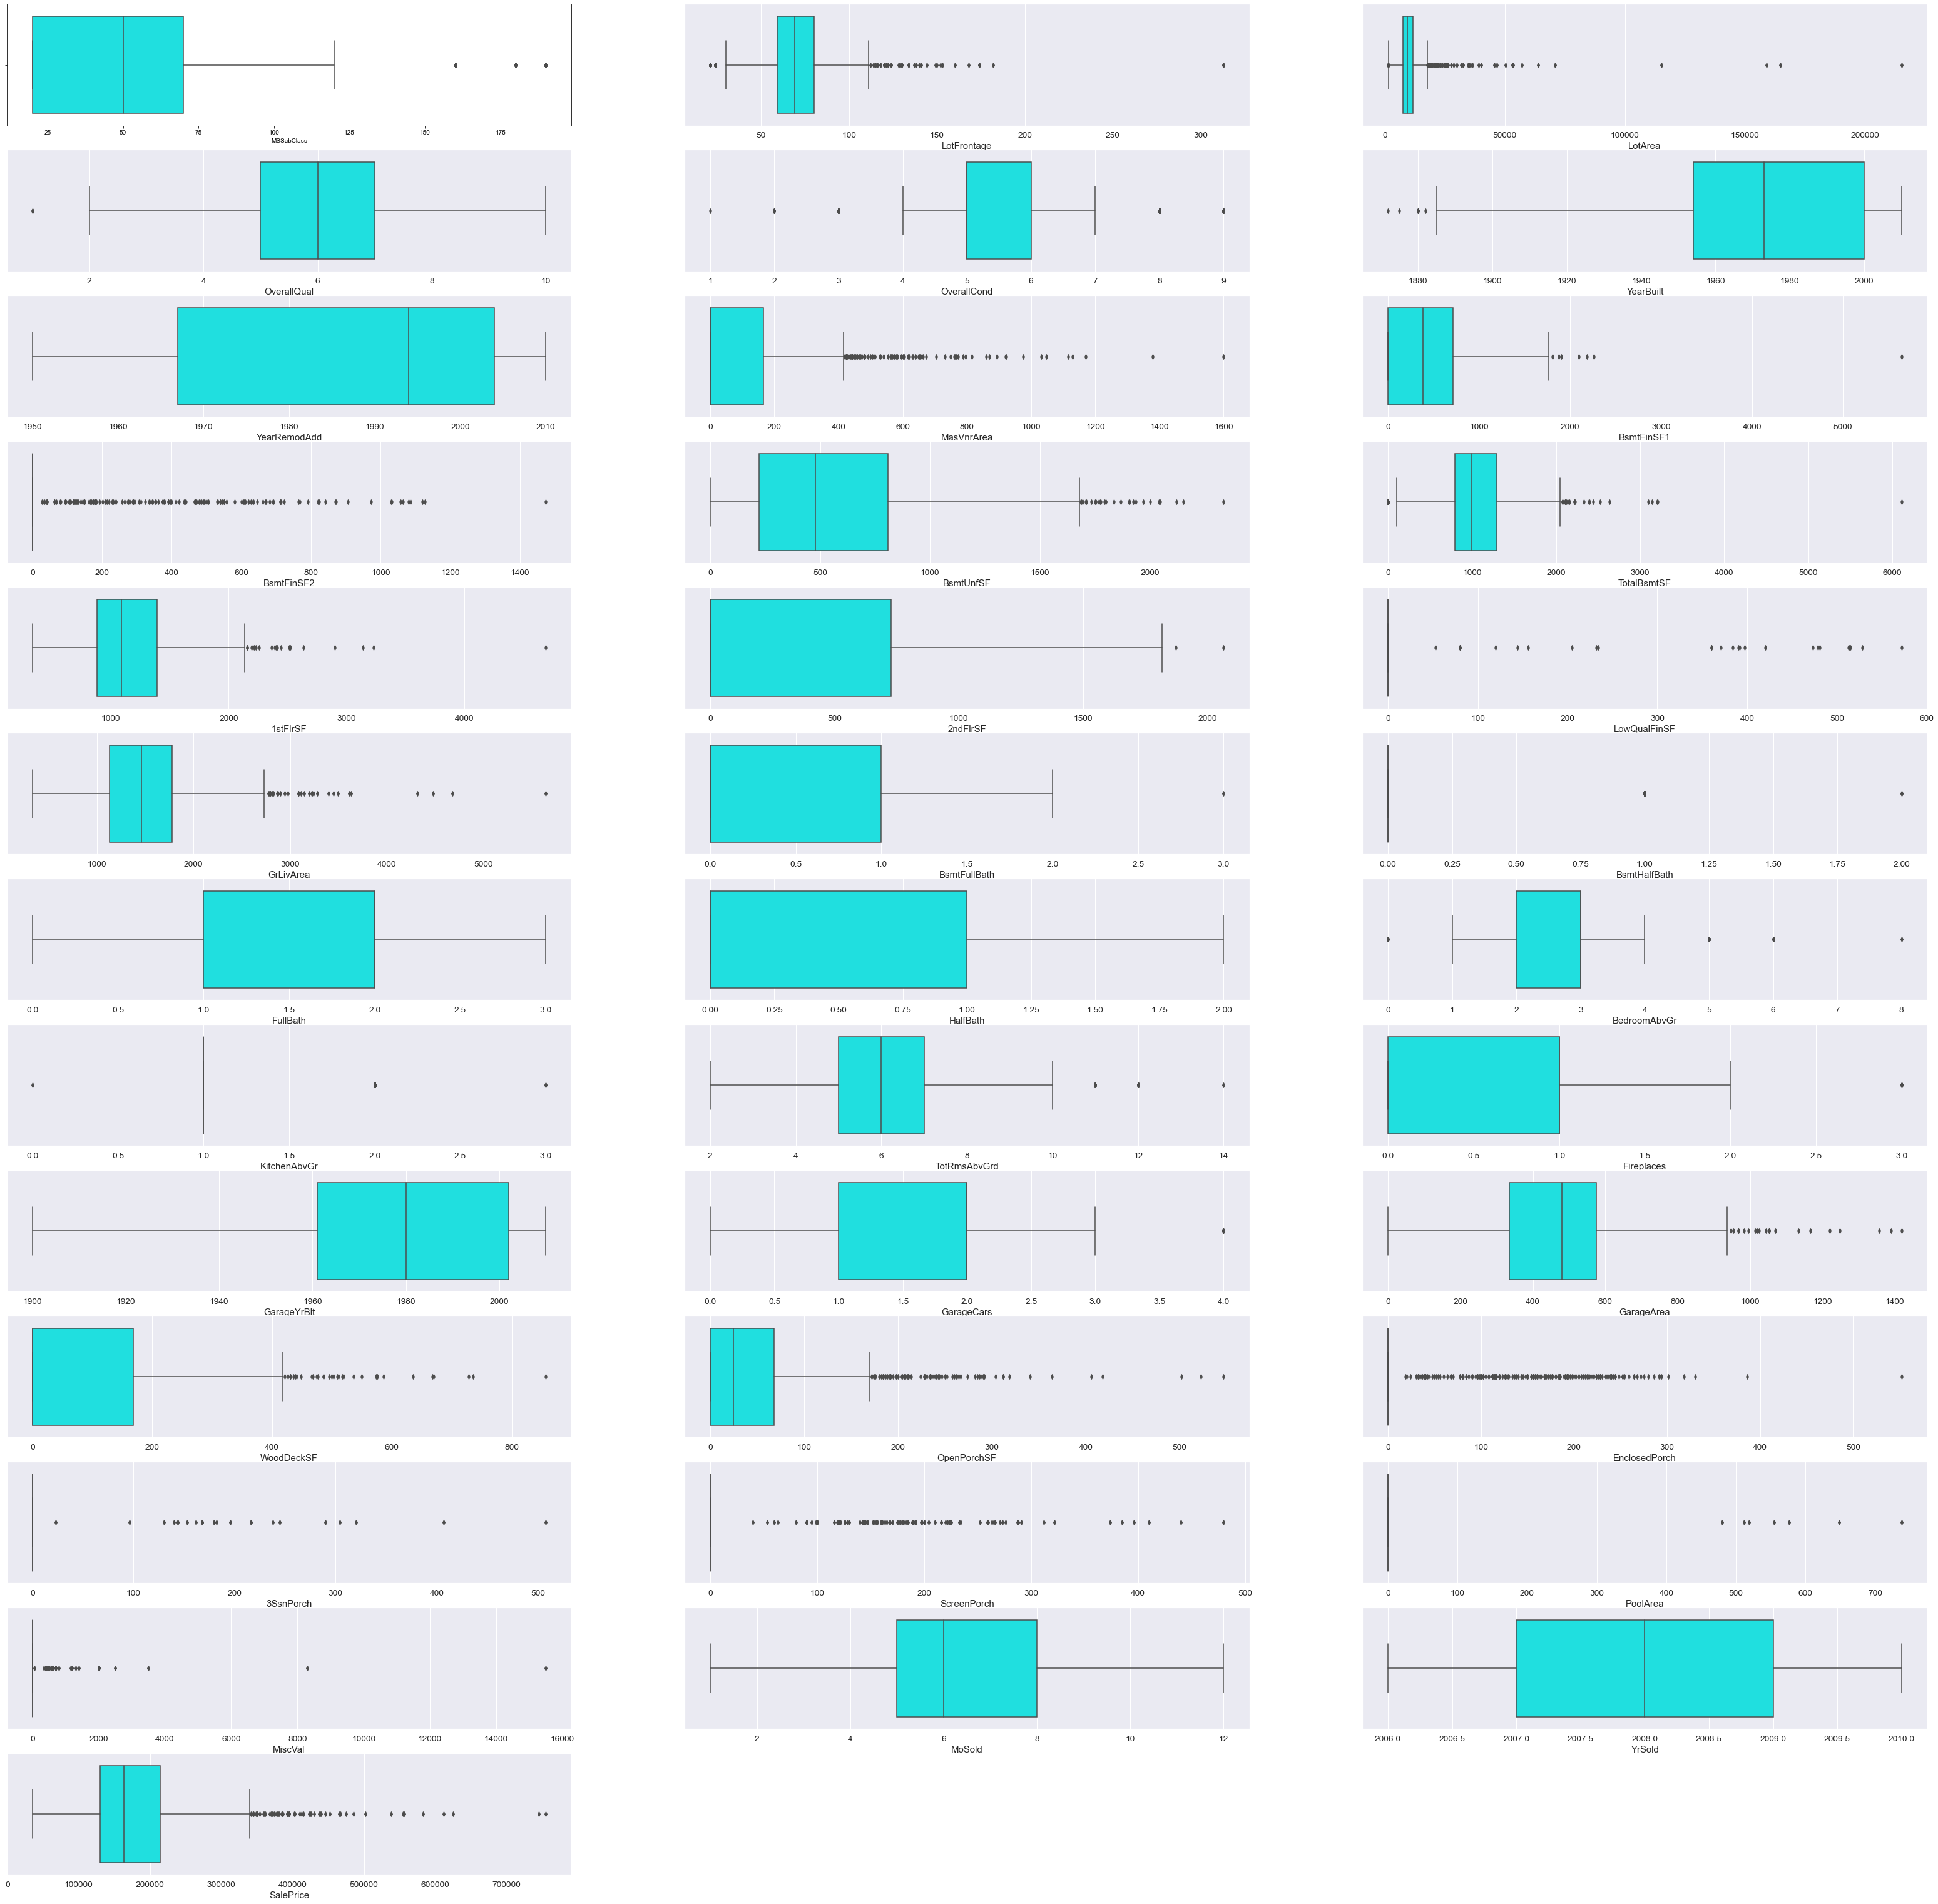

In [10]:
# Display boxplots for all numerical columns
print("Train dataset numerical columns: ")
plt.figure(figsize = (55,55))
for i in enumerate(num_cols_train):
    plt.subplot(13,3,i[0]+1)
    sns.set(font_scale=1.25)
    sns.boxplot(x=i[1],data=train,whis=1.5,color = "cyan")
    plt.xlabel(i[1]);
pass;

Test dataset numerical columns: 


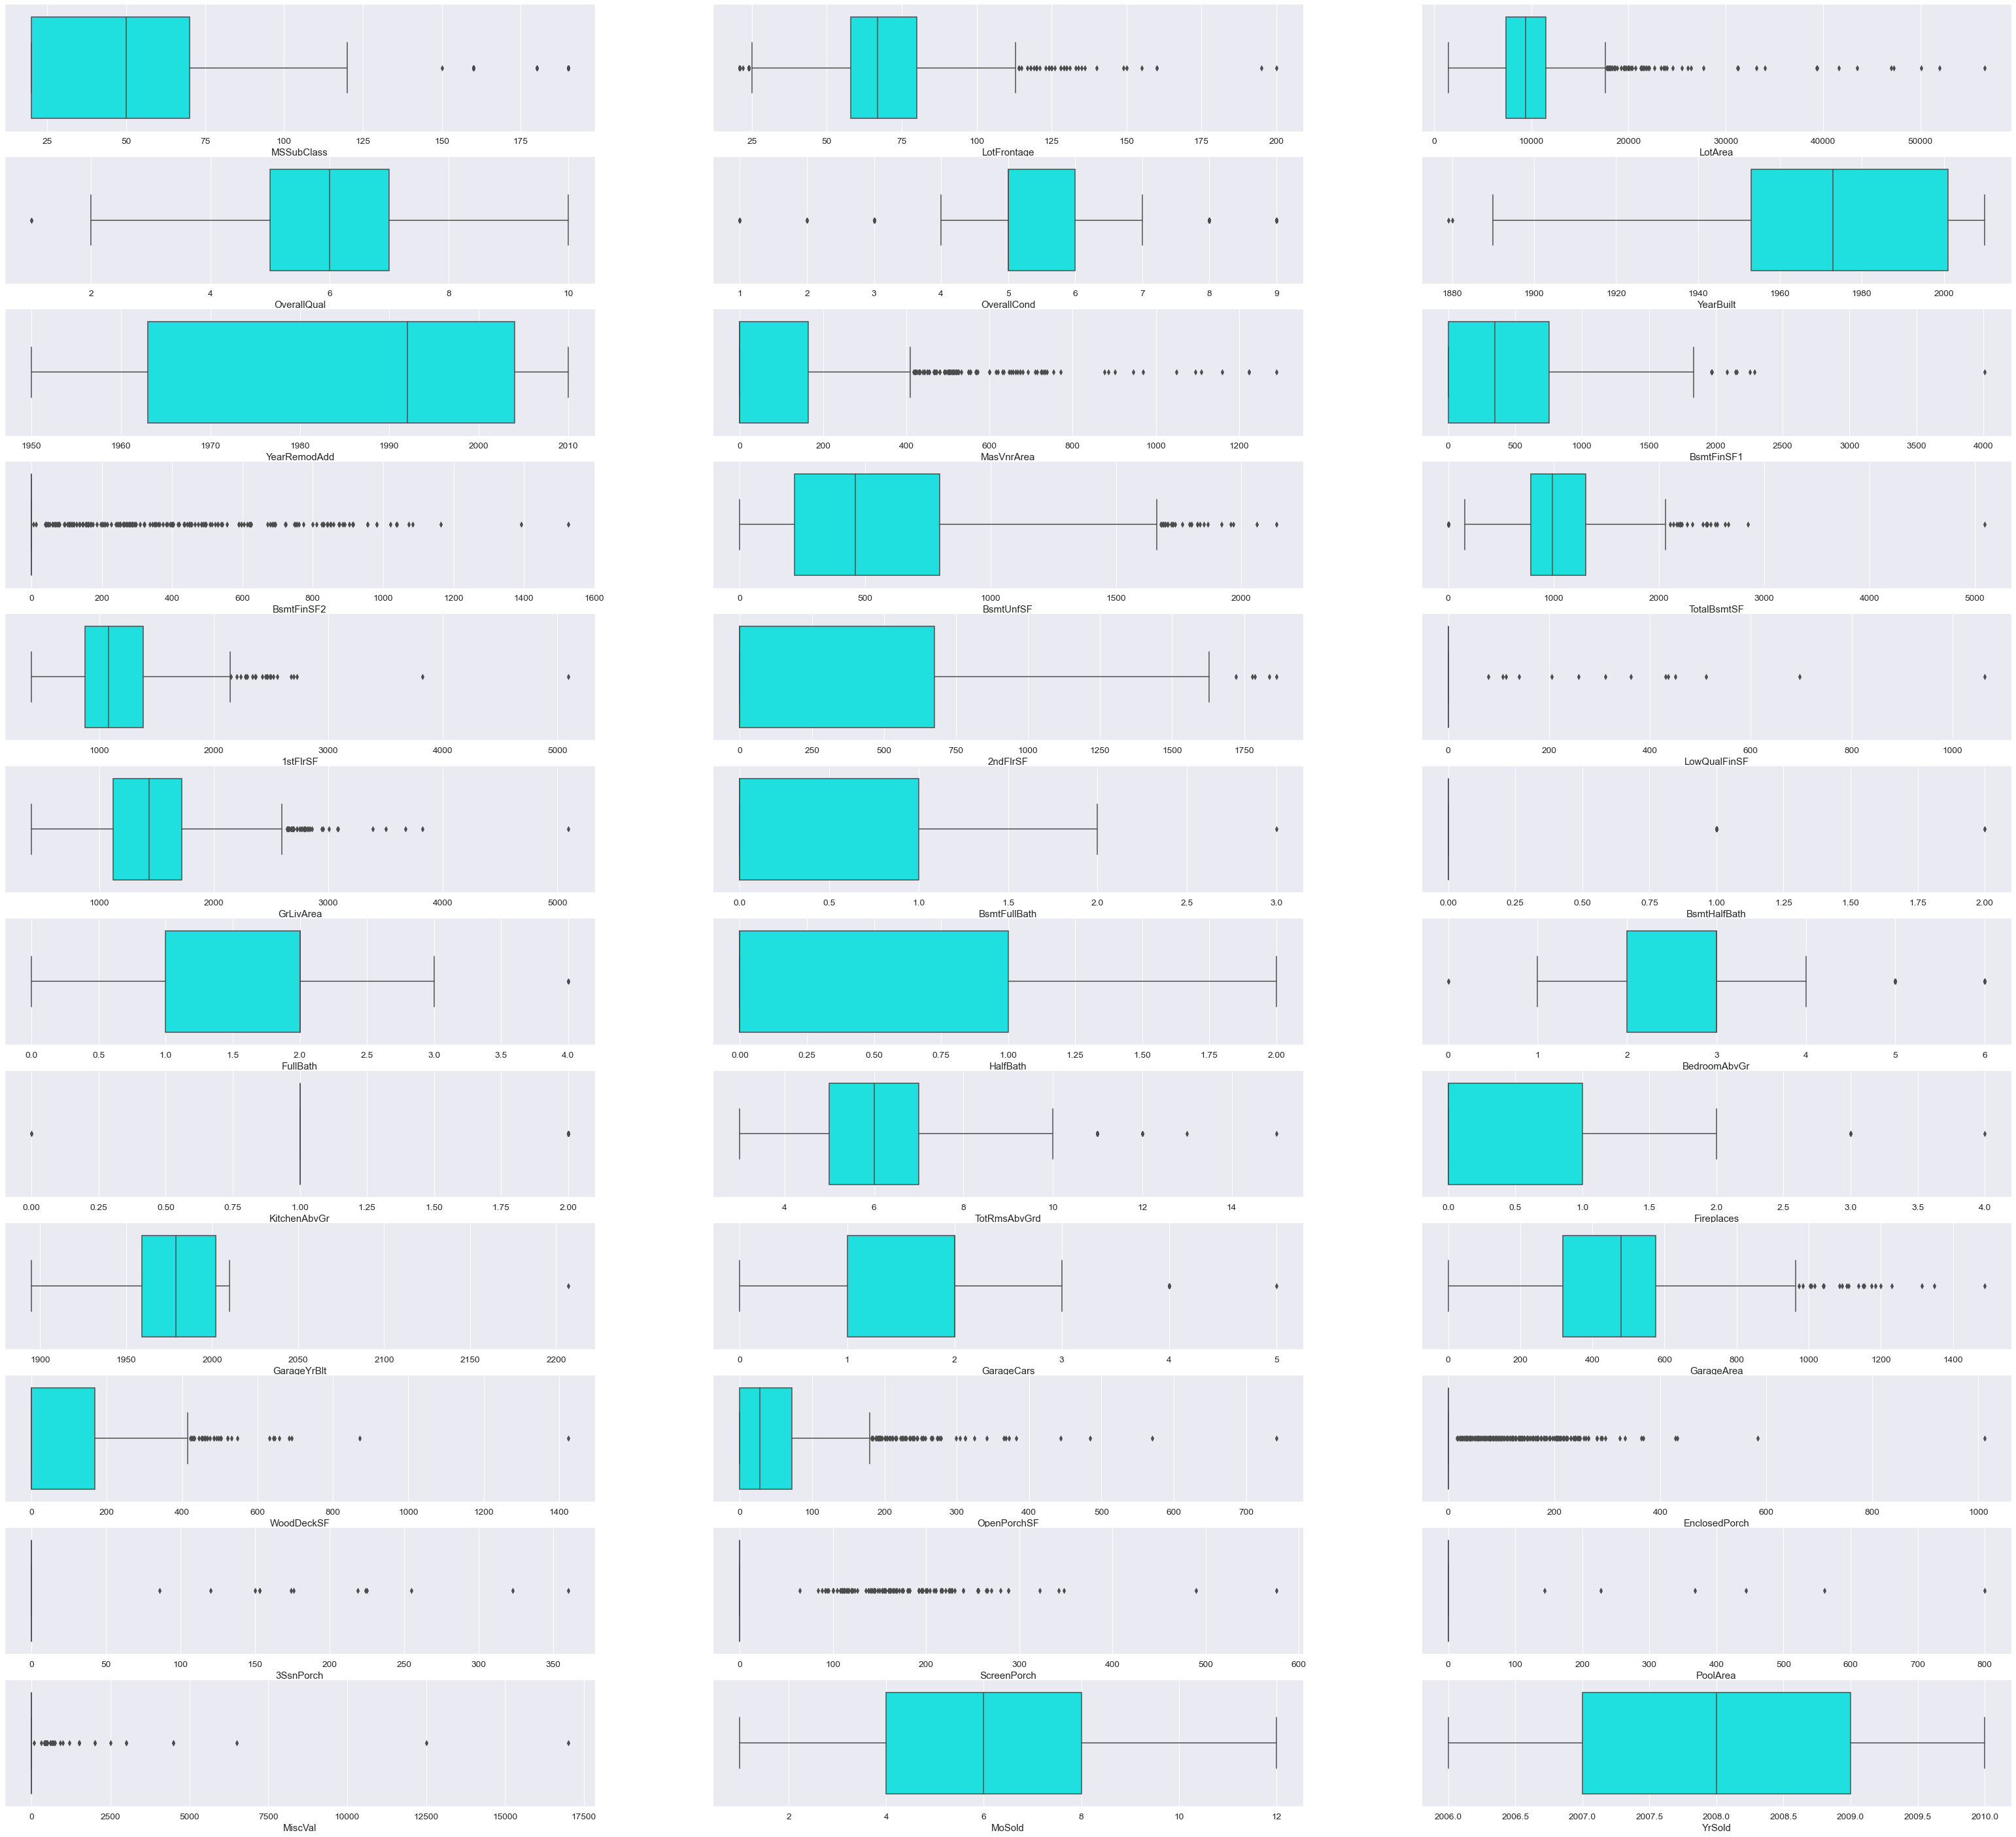

In [11]:
# Display boxplots for all numerical columns
print("Test dataset numerical columns: ")
plt.figure(figsize = (55,55))
for i in enumerate(num_cols_test):
    plt.subplot(13,3,i[0]+1)
    sns.set(font_scale=1.25)
    sns.boxplot(x=i[1],data=test,whis=1.5,color = "cyan")
    plt.xlabel(i[1]);
pass;

Train dataset numerical columns: 


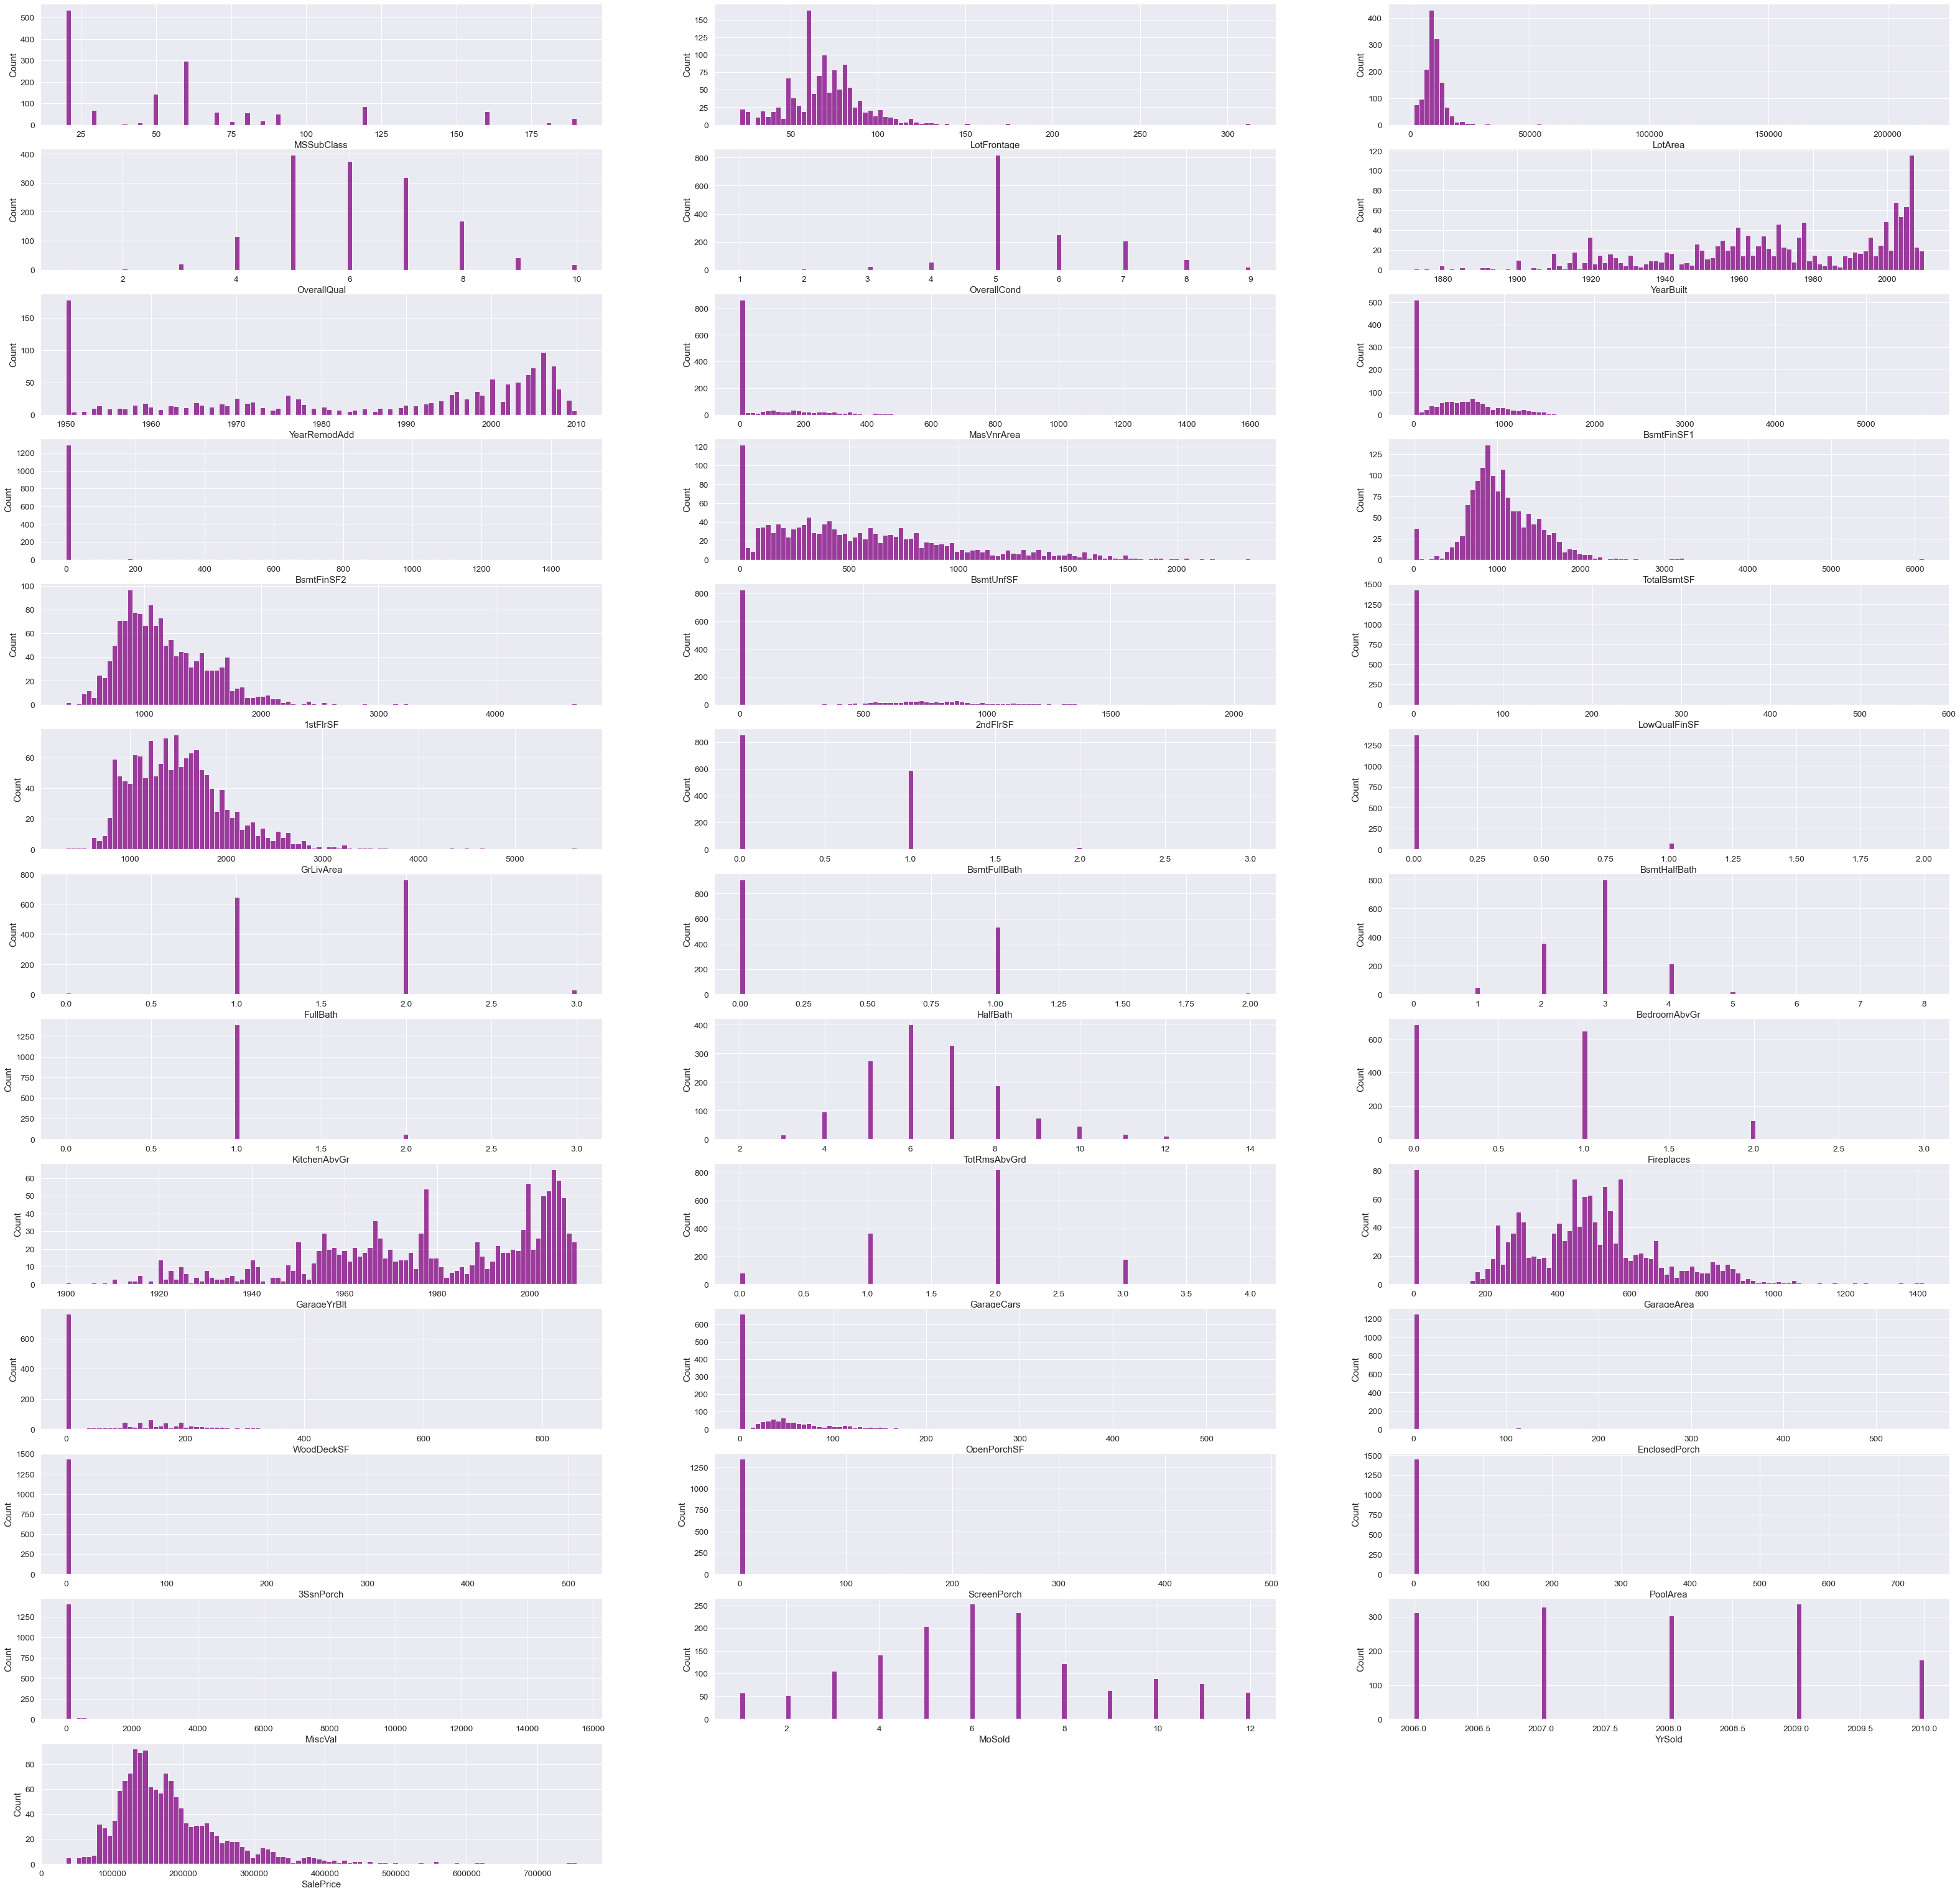

In [12]:
# Display histograms for all numerical columns
print("Train dataset numerical columns: ")
plt.figure(figsize = (55,55))
for i in enumerate(num_cols_train):
    plt.subplot(13,3,i[0]+1)
    sns.set(font_scale=1.25)
    sns.histplot(train[i[1]], bins=100, color='purple')
    plt.xlabel(i[1]);
pass;

Test dataset numerical columns: 


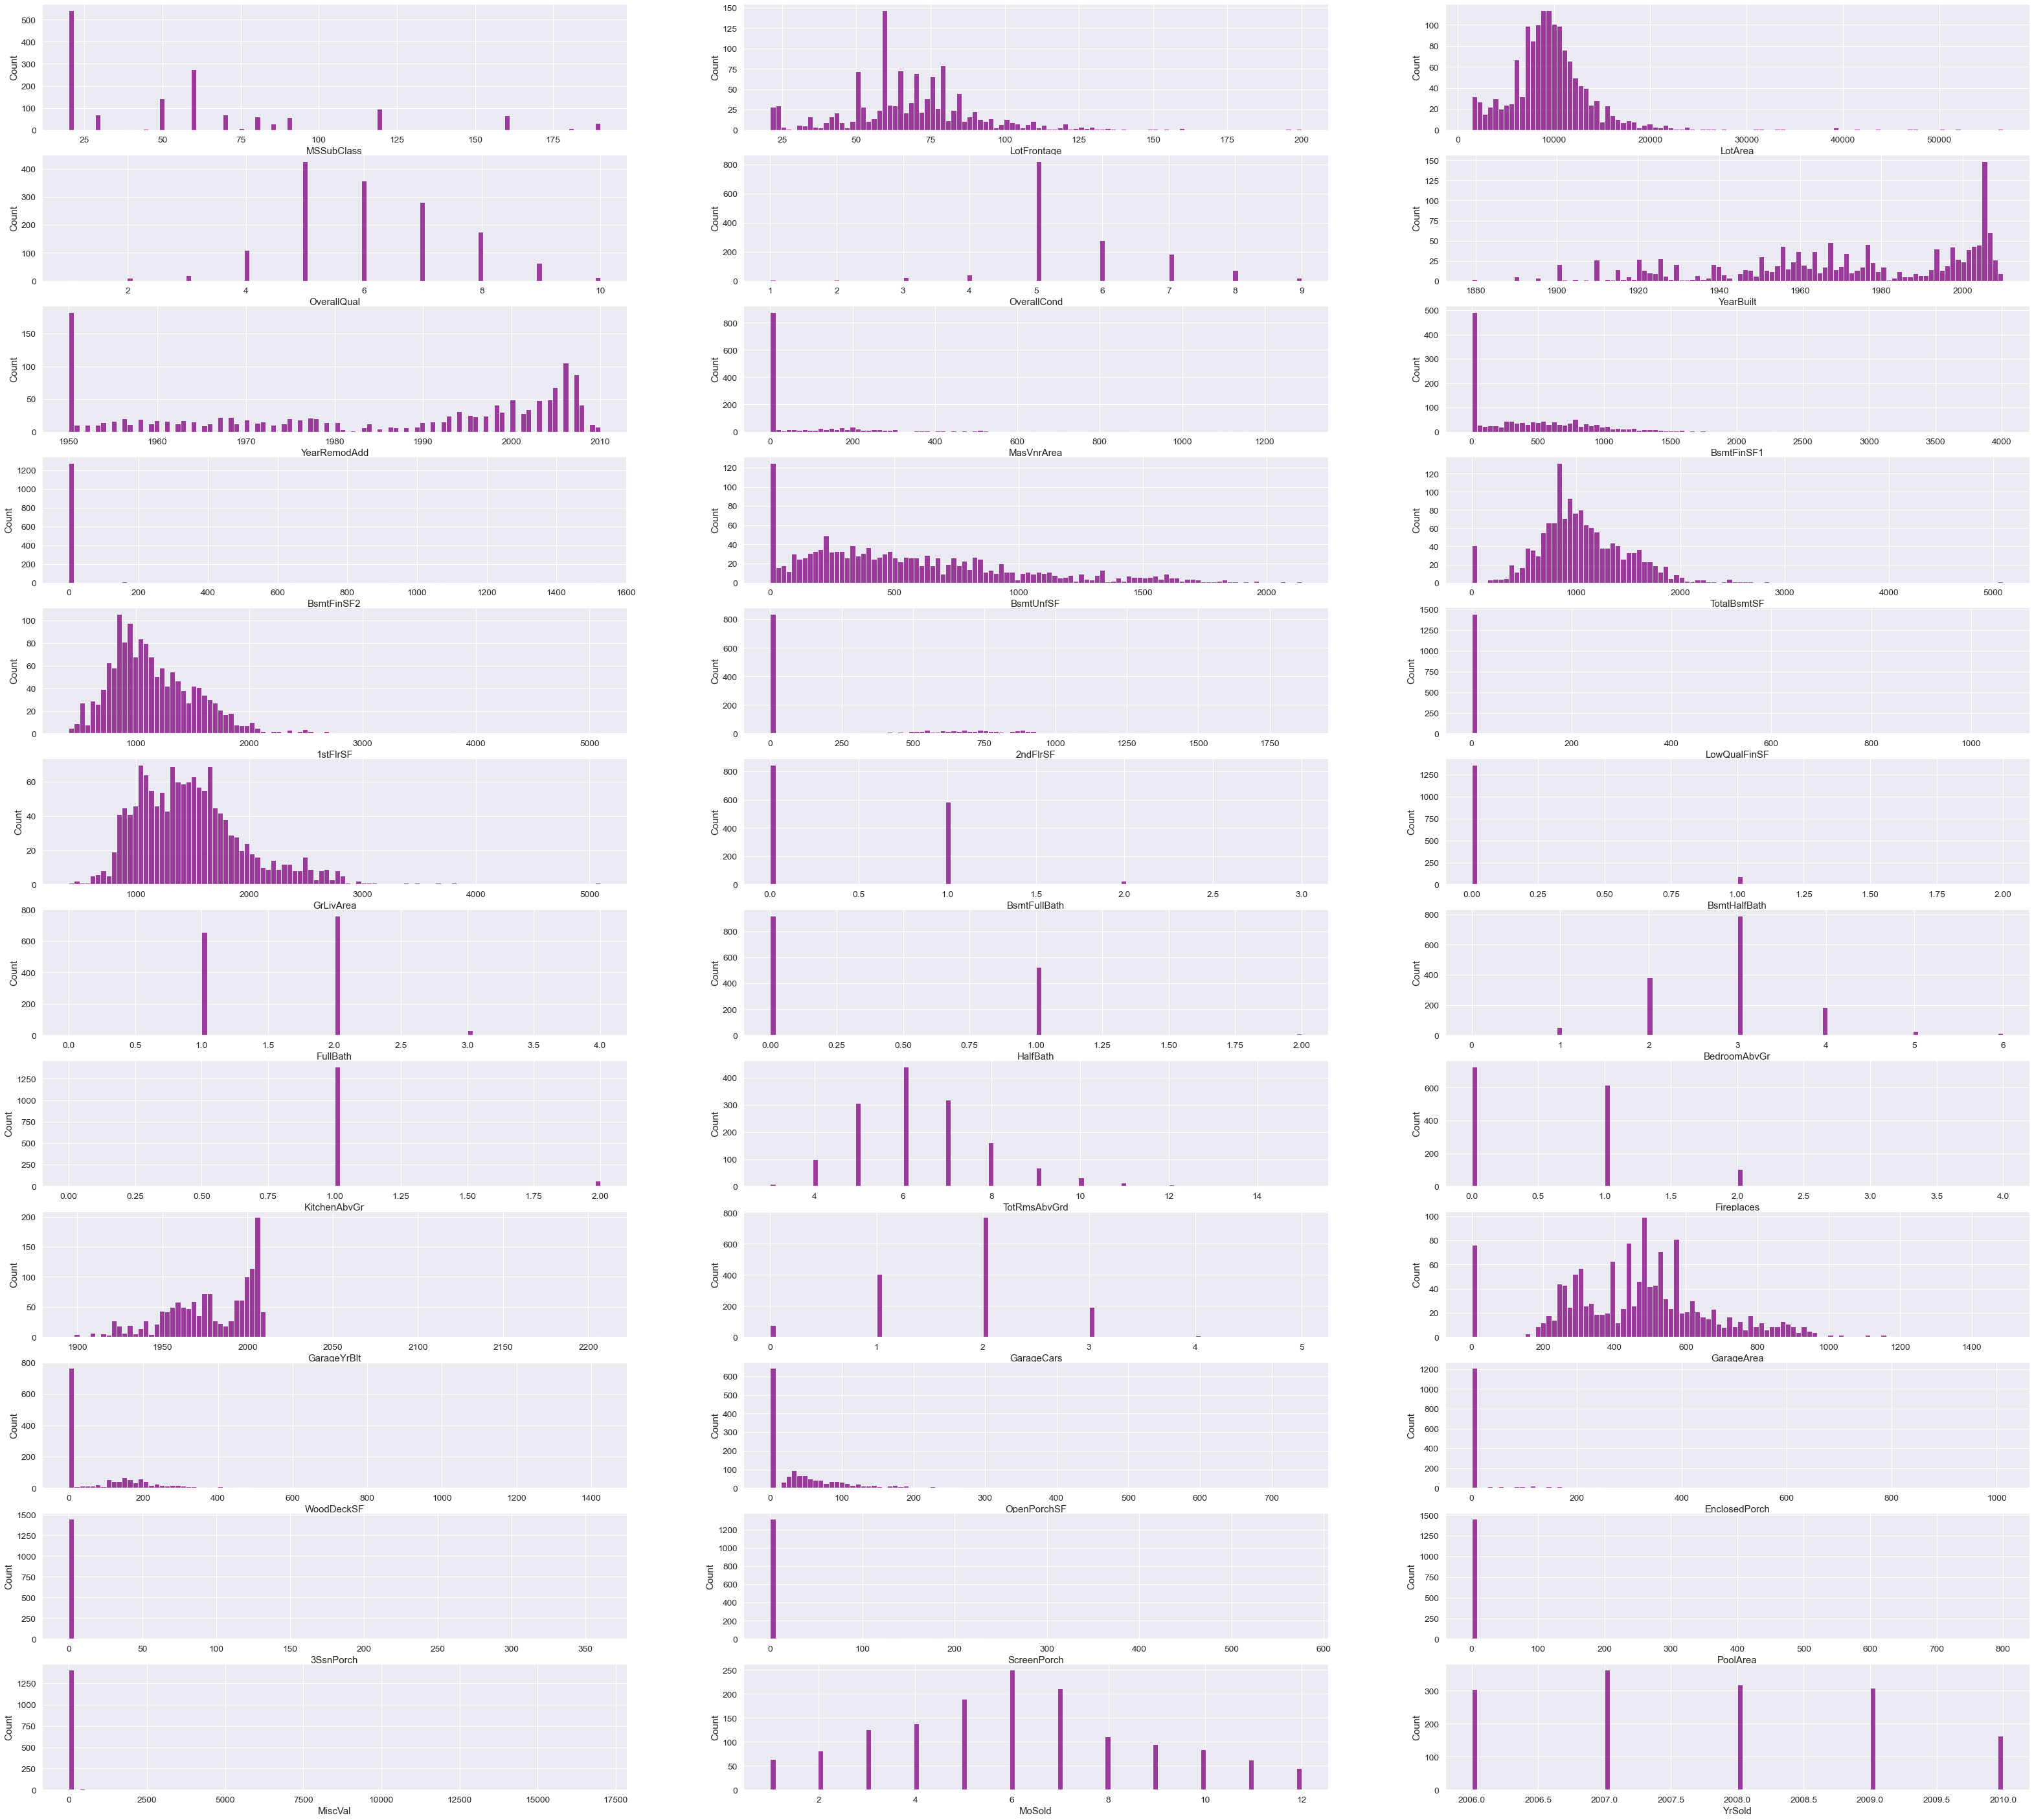

In [13]:
# Display histograms for all numerical columns
print("Test dataset numerical columns: ")
plt.figure(figsize = (55,55))
for i in enumerate(num_cols_test):
    plt.subplot(13,3,i[0]+1)
    sns.set(font_scale=1.25)
    sns.histplot(test[i[1]], bins=100, color='purple')
    plt.xlabel(i[1]);
pass;

## Missing Data Analysis

In [14]:
# Missing data percentage - Train
print("Train dataset Missing data: ")
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

Train dataset Missing data: 


,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [15]:
# Missing data percentage - Test
print("Test dataset Missing data: ")
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()*100/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

Test dataset Missing data: 


,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


In [16]:
#dealing with missing data
df_train = train.drop((missing_data_train[missing_data_train['Total'] > 500]).index,1)
df_test = test.drop((missing_data_test[missing_data_test['Total'] > 500]).index,1)

In [17]:
# Check for missing value in any column
print("Train Missing Values:")
df_train.isnull().sum()[df_train.isnull().sum()>0]
print("Test Missing Values:")
df_test.isnull().sum()[df_test.isnull().sum()>0]

Train Missing Values:


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Test Missing Values:


MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [18]:
#Combinig train and test data.
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 75)


In [19]:
#List of Categorical Columns
cate_cols = all_data.select_dtypes(include = ['O']).columns
cate_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
#List of Numerical Columns
num_cols = all_data._get_numeric_data().columns 
display(num_cols_test)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [21]:
#Imputing all categorical variable with mode
for col in cate_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [22]:
#Imputing all numerical variable with mean
for col in num_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mean())

In [23]:
# Check for missing value in any column
all_data.isnull().sum()[all_data.isnull().sum()>0]

Series([], dtype: int64)

## Checking for distribution of SalePrice

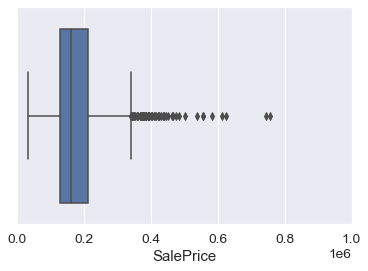

In [24]:
#Looking at the Boxplot of Dependent variable
sns.boxplot(x=train.SalePrice,)
plt.xlim([0,1000000]);

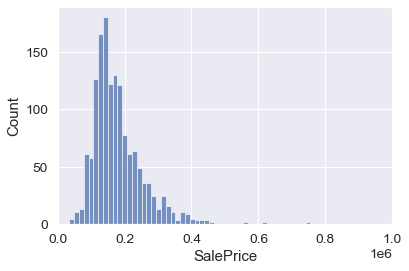

In [25]:
#Looking at the Histogram of Dependent variable
sns.histplot(x=train.SalePrice,bins = 50)
plt.xlim([0,1000000]);

# Review research design and modeling methods

## Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Process columns, apply LabelEncoder to categorical features
for c in cate_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
pass;    

In [28]:
# Shape        
print('Shape all_data: {}'.format(all_data.shape))
all_data.head()

Shape all_data: (2919, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4


In [29]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [30]:
# Getting dummy categorical features
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2919, 114)


In [31]:
# Splitting back to train and test
df_train = all_data[:ntrain]
df_test = all_data[ntrain:]

In [32]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train_log = np.log1p(y_train)

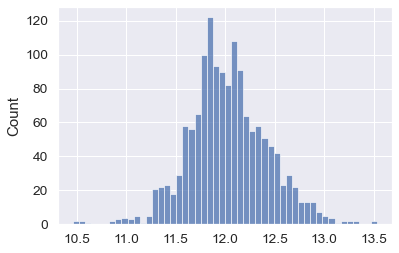

In [33]:
#Looking at the Histogram of Dependent variable after transformation
sns.histplot(x=y_train_log,bins = 50);

## Modelling

In [34]:
# Import librairies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
#Scales the data and returns the min-max scale of every variable
df_copy1 = df_train.copy()

std_scale = MinMaxScaler()
std_scale

#print numeric columns and counts
num_cols = df_copy1._get_numeric_data().columns 

for i in num_cols:
    df_copy1[i] = std_scale.fit_transform(df_copy1[[i]])
print(df_copy1.head())

MinMaxScaler()

         Id  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0  0.000000      0.75     0.150685  0.033420     1.0       1.0          1.0   
1  0.000685      0.75     0.202055  0.038795     1.0       1.0          1.0   
2  0.001371      0.75     0.160959  0.046507     1.0       0.0          1.0   
3  0.002056      0.75     0.133562  0.038561     1.0       0.0          1.0   
4  0.002742      0.75     0.215753  0.060576     1.0       0.0          1.0   

   Utilities  LotConfig  LandSlope  ...  MoSold_5  MoSold_6  MoSold_7  \
0        0.0        1.0        0.0  ...       0.0       0.0       0.0   
1        0.0        0.5        0.0  ...       1.0       0.0       0.0   
2        0.0        1.0        0.0  ...       0.0       0.0       0.0   
3        0.0        0.0        0.0  ...       0.0       0.0       0.0   
4        0.0        0.5        0.0  ...       0.0       0.0       0.0   

   MoSold_8  MoSold_9  YrSold_2006  YrSold_2007  YrSold_2008  YrSold_2009  \
0       0

In [49]:
#Basic linear regression - without crossvalidation (No Scaling)
train_df_reg1 = df_train
train_df_reg1["SalesPrice"] = y_train

# train-test 70-30 split
df_train_reg, df_test_reg = train_test_split(train_df_reg1, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('SalesPrice')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('SalesPrice')
X_test_1 = df_test_reg

#Regression
model = LinearRegression()
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)

#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  

<ipython-input-49-960fa308bf5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_reg1["SalesPrice"] = y_train


LinearRegression()

32447.728650238827

R^2 Scores:  [0.83472309 0.34082844 0.81797748 0.62169121 0.85332953 0.90078194
 0.8836445  0.64264374 0.86284227 0.80843359]

RMSE Scores:  [-30843.20531753 -77922.98734381 -27788.82442525 -43264.58872587
 -32262.09852535 -23086.88883379 -24072.97898251 -54877.20362307
 -28885.05841536 -33731.29503764]


array([0.83472309, 0.34082844, 0.81797748, 0.62169121, 0.85332953,
       0.90078194, 0.8836445 , 0.64264374, 0.86284227, 0.80843359])

array([-30843.20531753, -77922.98734381, -27788.82442525, -43264.58872587,
       -32262.09852535, -23086.88883379, -24072.97898251, -54877.20362307,
       -28885.05841536, -33731.29503764])